<a href="https://colab.research.google.com/github/Jordancls/Segmentacao_de_Clientes/blob/main/Segmenta%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP - DM: SEGMENTAÇÃO DE CLIENTES

**PASSO 1:** Entendimento do negócio e definição do problema: O dono do Shopping deseja entender seus clientes e identificar grupos de clientes-alvo para dar orientações à equipe de marketing e planejar sua estratégia.

# Entendimento dos Dados




**PASSO 2:** Coleta de dados: Os dados básicos dos clientes, como ID, idade, sexo, renda anual e pontuação de gastos, são coletados através dos cartões de sócio. O conjunto de dados utilizado neste exemplo pode ser encontrado no seguinte link do Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

**PASSO 3:** Pré-processamento de dados:

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

In [2]:
# Carregar o conjunto de dados
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Verificar as primeiras linhas do conjunto de dados
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Preparação de dados

Nessa etapa, os dados são limpos e preparados para serem utilizados no modelo. Isso inclui remover dados ausentes, duplicados ou incorretos, além de tratar valores inválidos ou outliers. No projeto, Eu limpei os dados removendo a coluna "gender" e criando duas novas colunas "Gender_Female" e "Gender_Male" com base no gênero dos clientes. Além disso, as bibliotecas utilizadas foram pandas, numpy, matplotlib.

pandas: https://pandas.pydata.org/

numpy: https://numpy.org/

matplotlib: https://matplotlib.org/


In [4]:
# Verificar dados ausentes
missing_values = data.isnull().sum()
print(f"Valores ausentes por coluna: {missing_values}")

Valores ausentes por coluna: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
# Verificar dados duplicados
duplicated_values = data.duplicated().sum()
print(f"Linhas duplicadas: {duplicated_values}")

Linhas duplicadas: 0


In [6]:
# tratar colunas categóricas
data = pd.get_dummies(data, columns=['Gender'])

In [7]:
# Verificar a estatística descritiva do conjunto de dados
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000                1.000000   
25%     50.750000   28.750000           41.500000               34.750000   
50%    100.500000   36.000000           61.500000               50.000000   
75%    150.250000   49.000000           78.000000               73.000000   
max    200.000000   70.000000          137.000000               99.000000   

       Gender_Female  Gender_Male  
count     200.000000   200.000000  
mean        0.560000     0.440000  
std         0.497633     0.497633  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     0.000000  
75%         1.000000     1.000000  
max         1.0000

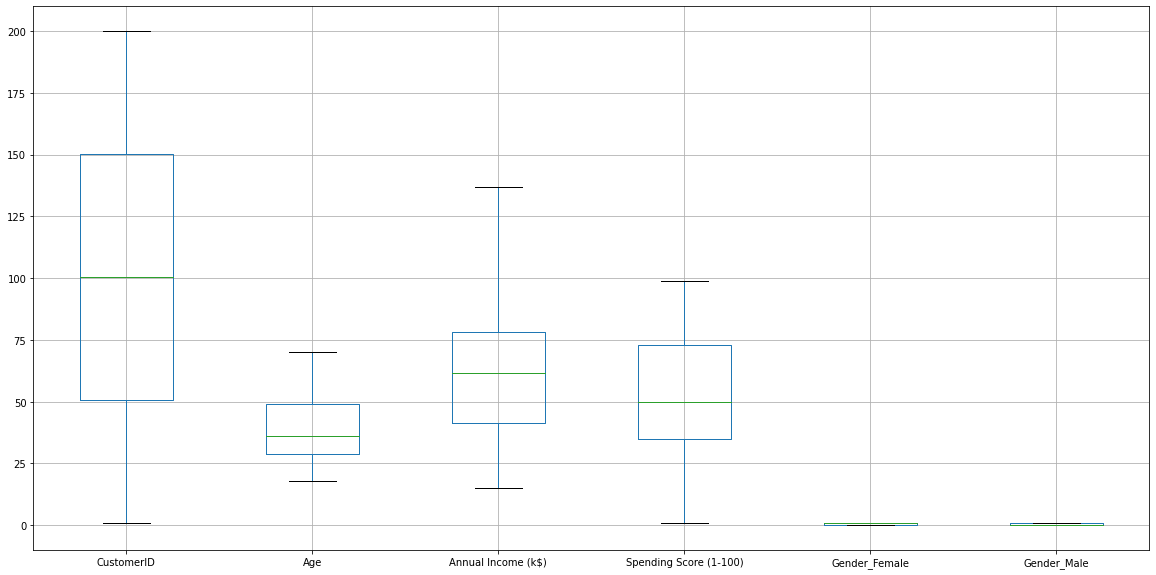

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
data.boxplot(whis=2)
plt.show()

In [10]:
from scipy import stats

z = np.abs(stats.zscore(data))
outliers = np.where(z > 3)
print(f"Outliers: {outliers}")


Outliers: (array([], dtype=int64), array([], dtype=int64))


**PASSO 4 :** Análise exploratória: Utilizar visualizações para entender a distribuição dos dados e identificar possíveis relações entre as variáveis.

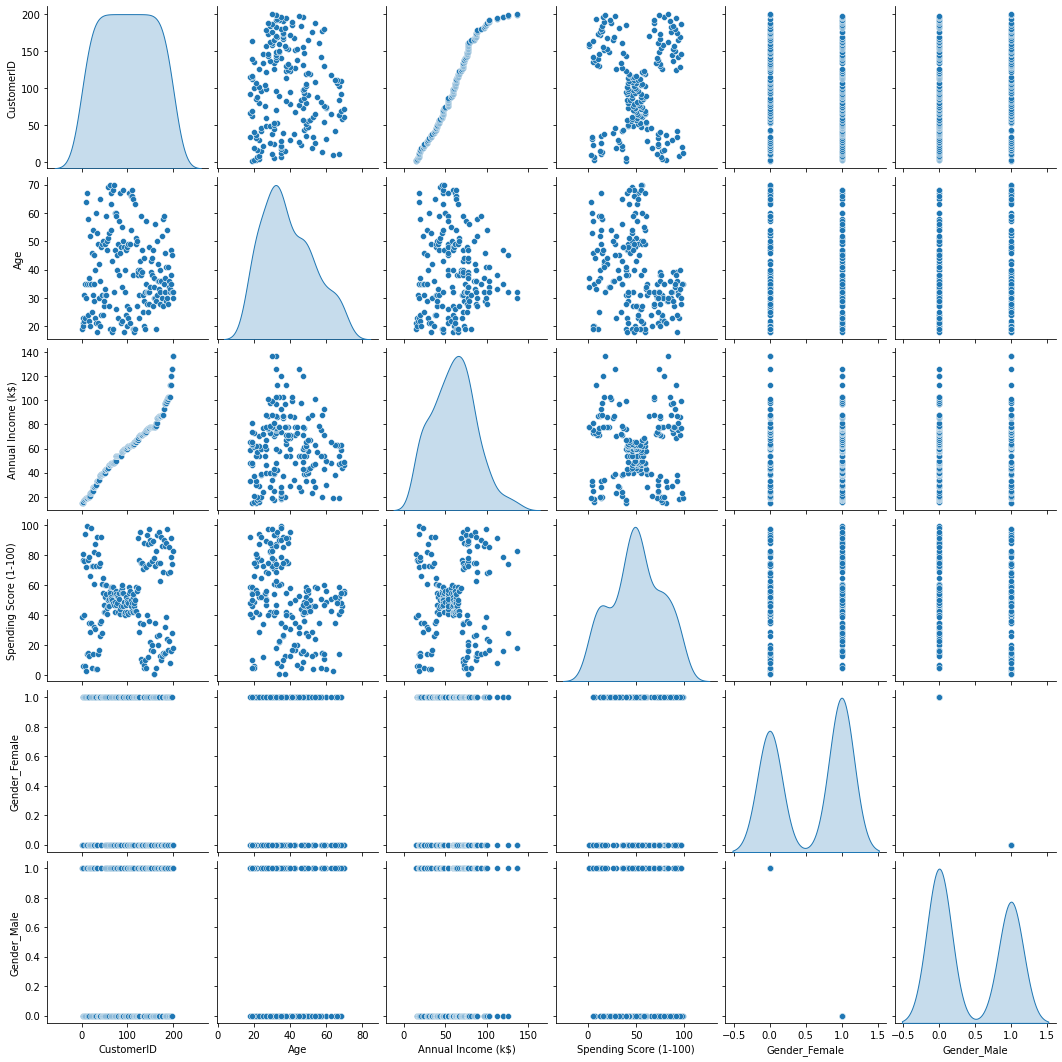

In [11]:
import seaborn as sns

sns.pairplot(data, diag_kind='kde')

**PASSO 5:** Modelagem

A fase de modelagem é onde os dados são utilizados para treinar e testar um modelo, para que possa ser utilizado para prever ou explicar a relação entre as variáveis.

O modelo utilizado neste projeto é o KMeans Clustering, um algoritmo de agrupamento não supervisionado que é usado para dividir os dados em grupos (clusters) de acordo com as similaridades entre as amostras. O objetivo é encontrar os clusters de forma que as amostras dentro de cada cluster sejam semelhantes entre si, mas diferentes das amostras dos outros clusters.

O algoritmo KMeans do scikit-learn (sklearn) é implementado como uma classe KMeans, que possui os seguintes parâmetros principais:

n_clusters: número de clusters a serem formados.
init: método de inicialização dos centróides.
n_init: número de vezes que o algoritmo será executado com diferentes centróides.
max_iter: número máximo de iterações para encontrar os centróides ótimos.
A documentação completa do KMeans Clustering no scikit-learn pode ser encontrada aqui: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Para utilizar o algoritmo KMeans, você precisará importar a classe KMeans do pacote

In [12]:
# Importar a biblioteca Sklearn
from sklearn.cluster import KMeans

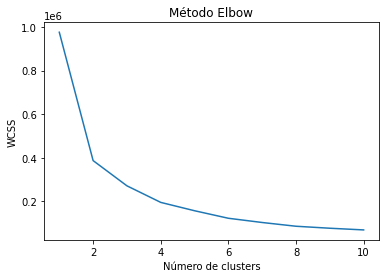

In [13]:
# Utilizar o método Elbow para escolher o número de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Treinar o modelo com o número de clusters escolhido
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)

In [15]:
# Adicionar a coluna de segmento ao conjunto de dados
data['Segment'] = pred_y

**PASSO 6:** AVALIAÇÃO

In [16]:
# Analisar os resultados
print(data.groupby('Segment').mean())

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Segment                                                                      
0              31.5  37.451613           30.612903               49.838710   
1              97.5  42.814286           59.542857               50.514286   
2             166.5  36.044118           88.911765               50.205882   

         Gender_Female  Gender_Male  
Segment                              
0             0.596774     0.403226  
1             0.542857     0.457143  
2             0.544118     0.455882  


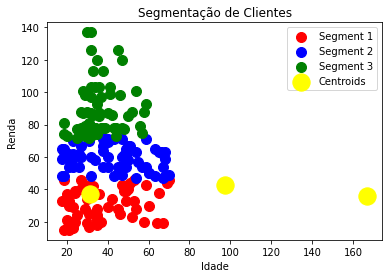

In [17]:
# Visualizar os resultados com gráficos
plt.scatter(data[pred_y == 0]['Age'], data[pred_y == 0]['Annual Income (k$)'], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(data[pred_y == 1]['Age'], data[pred_y == 1]['Annual Income (k$)'], s = 100, c = 'blue', label = 'Segment 2')
plt.scatter(data[pred_y == 2]['Age'], data[pred_y == 2]['Annual Income (k$)'], s = 100, c = 'green', label = 'Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Segmentação de Clientes')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.legend()
plt.show()



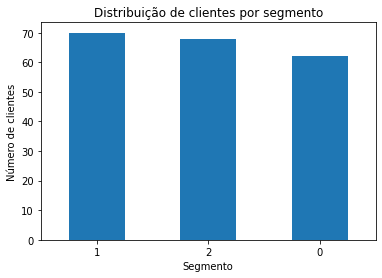

In [18]:
segment_counts = data['Segment'].value_counts()
segment_counts.plot(kind='bar', rot=0)
plt.xlabel('Segmento')
plt.ylabel('Número de clientes')
plt.title('Distribuição de clientes por segmento')
plt.show()


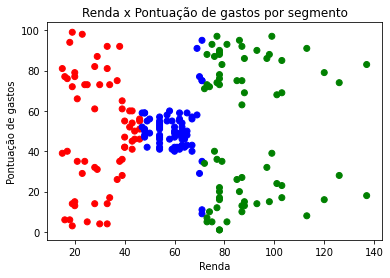

In [19]:
colors = ['red', 'blue', 'green']
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Segment'].apply(lambda x: colors[x]))
plt.xlabel('Renda')
plt.ylabel('Pontuação de gastos')
plt.title('Renda x Pontuação de gastos por segmento')
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


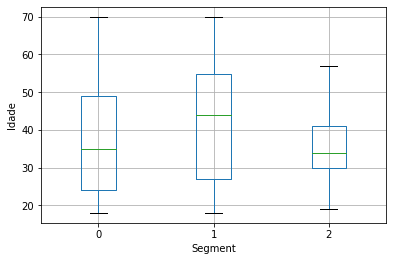

In [20]:
data.boxplot(column='Age', by='Segment', showfliers=False)
plt.ylabel('Idade')
plt.title('')
plt.suptitle('')
plt.show()


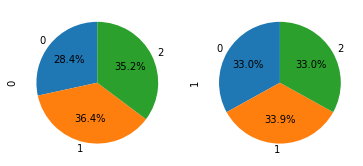

In [21]:
gender_counts = data.groupby(['Segment', 'Gender_Female']).size().reset_index(name='Counts')
gender_counts = gender_counts.pivot(index='Segment', columns='Gender_Female', values='Counts')
gender_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', startangle=90, legend=False)
plt.show()


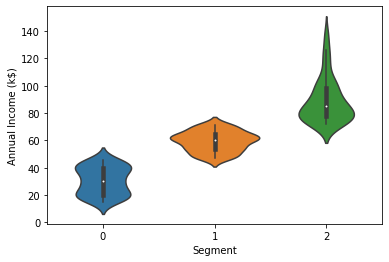

In [22]:
sns.violinplot(x='Segment', y='Annual Income (k$)', data=data)
plt.show()